

This notebook contains the work for Step 3 of the Data Science Method:

The Data Science Method

1.Problem Identification

2.Data Wrangling

         . Data Collection
         . Data Organization
         . Data Definition
         . Data Cleaning

3.Exploratory Data Analysis

   . Build data profile tables and plots

     - Outliers & Anomalies

   . Explore data relationships
   
   . Identification and creation of features</b>

1.Pre-processing and Training Data Development

       . Create dummy or indicator features for categorical variables
       . Standardize the magnitude of numeric features
       . Split into testing and training datasets
       . Apply scaler to the testing set

2.Modeling

       . Fit Models with Training Data Set
       . Review Model Outcomes — Iterate over additional models as needed.
       . Identify the Final Model
3.Documentation

       . Review the Results
       . Present and share your findings - storytelling
       . Finalize Code
       . Finalize Documentation



Overview

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 473 frauds out of 283253 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.17% of all transactions.

In [33]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from matplotlib import gridspec
from scipy.stats import chi2_contingency

Data Description

1.The datasets contains transactions made by credit cards in September 2013 by european cardholders. The transactions occur in two days.

2.Features V1, V2, ... V28 are the principal components obtained with PCA.

3.Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.

4.The feature 'Amount' is the transaction Amount.

5.Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [3]:
pd.set_option('display.max_rows', 1500)

Read and Explore the data set

In [34]:
# load the data saved from step 2
df=pd.read_csv('C:\\Users\\arna_mora\\Springboard\\unit 7\\creditcard.csv')
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Build data profile tables and plots

In [35]:
# Print out the summary stats table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


Unblanced dataset

In [36]:
# information of all columns:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283726 entries, 0 to 283725
Data columns (total 31 columns):
Time      283726 non-null float64
V1        283726 non-null float64
V2        283726 non-null float64
V3        283726 non-null float64
V4        283726 non-null float64
V5        283726 non-null float64
V6        283726 non-null float64
V7        283726 non-null float64
V8        283726 non-null float64
V9        283726 non-null float64
V10       283726 non-null float64
V11       283726 non-null float64
V12       283726 non-null float64
V13       283726 non-null float64
V14       283726 non-null float64
V15       283726 non-null float64
V16       283726 non-null float64
V17       283726 non-null float64
V18       283726 non-null float64
V19       283726 non-null float64
V20       283726 non-null float64
V21       283726 non-null float64
V22       283726 non-null float64
V23       283726 non-null float64
V24       283726 non-null float64
V25       283726 non-null float64
V26  

Observing from the above columns information of the credit card dataframe created we can observe that about 31 parameters are available for about 280000 credit card transactions. The data obtained in this dataset was as a result of Principle Component Analysis (PCA) for dimensionality reduction performed in order to protect the sensitive information prevalent in the original dataset. The Class column indicates 0 for valid transaction and 1 for fraudulent transaction.

In [37]:
#For now I will look the "normal" columns
df[["Time","Amount","Class"]].describe()

,Time,Amount,Class
count,283726.000000,283726.000000,283726.000000
mean,94811.077600,88.472687,0.001667
std,47481.047891,250.399437,0.040796
min,0.000000,0.000000,0.000000
25%,54204.750000,5.600000,0.000000
50%,84692.500000,22.000000,0.000000
75%,139298.000000,77.510000,0.000000
max,172792.000000,25691.160000,1.000000


First of all, I will explore through 3 different columns:

.Time

.Amount

.Class

Distribuition of Valid(0) and Frauds(1): 
0    283253
1       473
Name: Class, dtype: int64


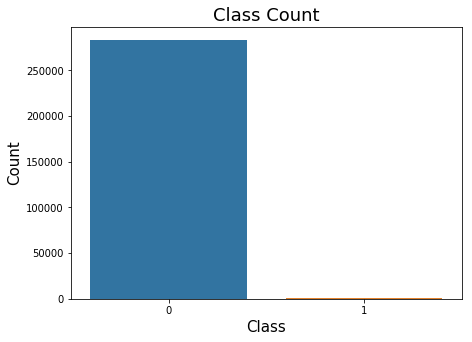

In [59]:
#Lets start looking the difference by Valid and Fraud transactions
print("Distribuition of Valid(0) and Frauds(1): ")
print(df["Class"].value_counts())

plt.figure(figsize=(7,5))
sns.countplot(df['Class'])
plt.title("Class Count", fontsize=18)
plt.xlabel("Class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

We have a clearly imbalanced data.

I will do some explore through the Time and Amount and then I will explore the V's Features, that are PCA's.

Time Features and some Feature Engineering

As our Time feature are in seconds we will transform it to minutes and hours to get a better understand of the patterns

In [39]:
timedelta = pd.to_timedelta(df['Time'], unit='s')
df['Time_min'] = (timedelta.dt.components.minutes).astype(int)
df['Time_hour'] = (timedelta.dt.components.hours).astype(int)

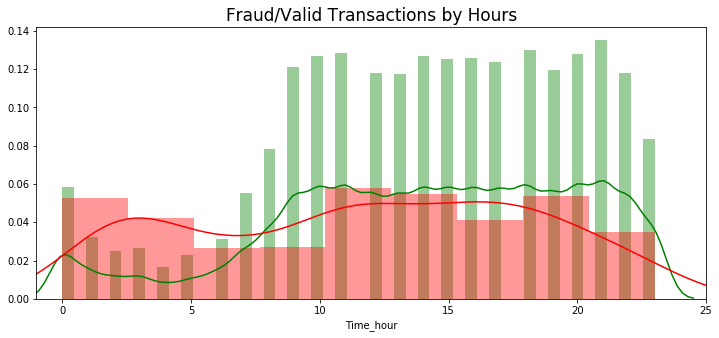

In [40]:
#Exploring the distribuition by Class types throught hours and minutes
plt.figure(figsize=(12,5))
sns.distplot(df[df['Class'] == 0]["Time_hour"], 
             color='g')
sns.distplot(df[df['Class'] == 1]["Time_hour"], 
             color='r')
plt.title('Fraud/Valid Transactions by Hours', fontsize=17)
plt.xlim([-1,25])
plt.show()

Fraudulent transactions by hour
 
 As we can see below,the most fraudulent transactions happening at 11,2  o'clock.
 Fraudulent transactions of the same account didn't happen consecutively.

In [50]:
aggregations = {
    'Class': 'sum'
    # 'class' : lambda x: sum(x)
  }
fraud_by_hour=df.groupby('Time_hour',as_index=False).agg(aggregations)
fraud_by_hour.sort_values('Class',ascending=False ).head()

,Time_hour,Class
11,11,53
2,2,48
18,18,28
17,17,28
15,15,26


The above scatter plot shows the absolute number of fradulant transactions every hour, but we may actually need to look at the percent ratio of the number of fradulant transactions per total number of transactions.

In [48]:
aggregations = {
    'Amount':'count',
    'Class': 'sum'
    # 'class' : lambda x: sum(x)
  }
fraud_percent_by_hour=df.groupby('Time_hour',as_index=False).agg(aggregations)
fraud_percent_by_hour['fraud_per_totnum']=fraud_percent_by_hour['Class']/fraud_percent_by_hour['Amount']*100
fraud_percent_by_hour.sort_values('fraud_per_totnum',ascending=False ).head()

,Time_hour,Amount,Class,fraud_per_totnum
2,2,3308,48,1.451028
4,4,2204,23,1.043557
3,3,3487,17,0.487525
5,5,2988,11,0.368139
7,7,7233,23,0.317987


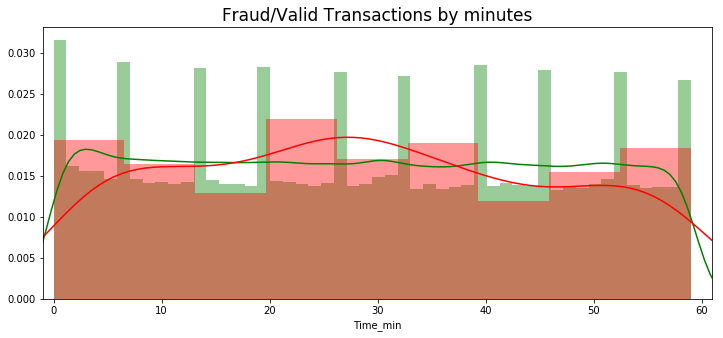

In [42]:
#Exploring the distribuition by Class types throught hours and minutes
plt.figure(figsize=(12,5))
sns.distplot(df[df['Class'] == 0]["Time_min"], 
             color='g')
sns.distplot(df[df['Class'] == 1]["Time_min"], 
             color='r')
plt.title('Fraud/Valid Transactions by minutes', fontsize=17)
plt.xlim([-1,61])
plt.show()

Within the 60 minutes window, the highest fradulant transactions occured at minute 4th and 26th. 

In [43]:
aggregations = {
    'Class': 'sum'
    # 'class' : lambda x: sum(x)
  }
fraud_by_hour=df.groupby('Time_min',as_index=False).agg(aggregations)
fraud_by_hour.sort_values('Class',ascending=False ).head()

,Time_min,Class
26,26,17
4,4,16
21,21,14
12,12,14
50,50,13


Let's see how time compares across fraudulent and valid transactions.

In [45]:
print ("Fraud")
print (df.Time[df.Class == 1].describe())
print ()
print ("Valid")
print (df.Time[df.Class == 0].describe())

Fraud
count       473.000000
mean      80450.513742
std       48636.179973
min         406.000000
25%       41203.000000
50%       73408.000000
75%      129095.000000
max      170348.000000
Name: Time, dtype: float64

Valid
count    283253.000000
mean      94835.058093
std       47475.550607
min           0.000000
25%       54233.000000
50%       84711.000000
75%      139308.000000
max      172792.000000
Name: Time, dtype: float64


Looking the statistics of our Amount class frauds and valid transactions

In [44]:
#To clearly the data of frauds and no frauds
df_fraud = df[df['Class'] == 1]
df_normal = df[df['Class'] == 0]

print("Fraud transaction statistics")
print(df["Amount"].describe())
print("\nValid transaction statistics")
print(df_normal["Amount"].describe())

Fraud transaction statistics
count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64

Valid transaction statistics
count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64


it's Interesting.

Using this informations I will filter the values to look for Amount by Class,
I will filter the "Valid" amounts by 5.000

In [55]:
#Feature engineering to a better visualization of the values
df['Amount_log'] = np.log(df.Amount + 0.01)

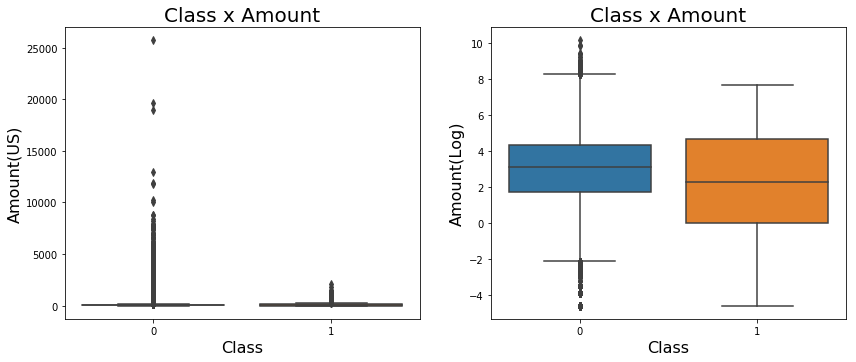

In [57]:
plt.figure(figsize=(14,6))
#I will explore the Amount by Class and see the distribuition of Amount transactions
plt.subplot(121)
ax = sns.boxplot(x ="Class",y="Amount",
                 data=df)
ax.set_title("Class x Amount", fontsize=20)
ax.set_xlabel("Class", fontsize=16)
ax.set_ylabel("Amount(US)", fontsize = 16)

plt.subplot(122)
ax1 = sns.boxplot(x ="Class",y="Amount_log", data=df)
ax1.set_title("Class x Amount", fontsize=20)
ax1.set_xlabel("Class", fontsize=16)
ax1.set_ylabel("Amount(Log)", fontsize = 16)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

The IQR of fraudulent transactions are higher than valid transactions, but valid transactions have highest values.

Looking a scatter plot of the Time_min distribuition by Amount

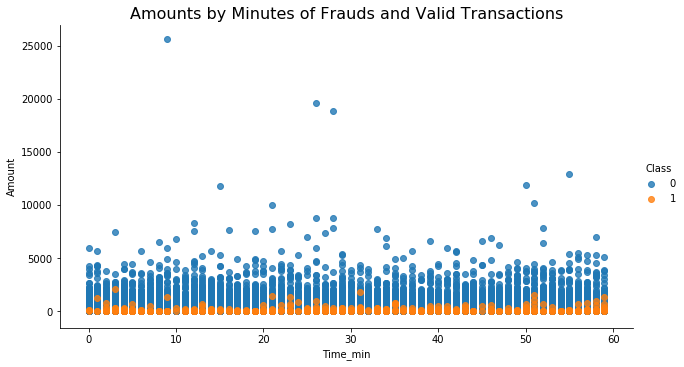

In [17]:
#Looking the Amount and time distribuition of FRAUD transactions
ax = sns.lmplot(y="Amount", x="Time_min", fit_reg=False,aspect=1.8,
                data=df, hue='Class')
plt.title("Amounts by Minutes of Frauds and Valid Transactions",fontsize=16)
plt.show()

Looking a scatter plot of the Time_hour distribuition by Amount

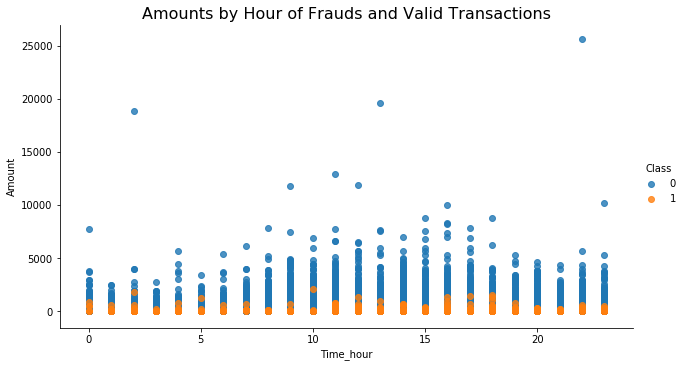

In [58]:
ax = sns.lmplot(y="Amount", x="Time_hour", fit_reg=False,aspect=1.8,
                data=df, hue='Class')
plt.title("Amounts by Hour of Frauds and Valid Transactions", fontsize=16)

plt.show()

Now I will be visualizing all the features from the dataset on graphs

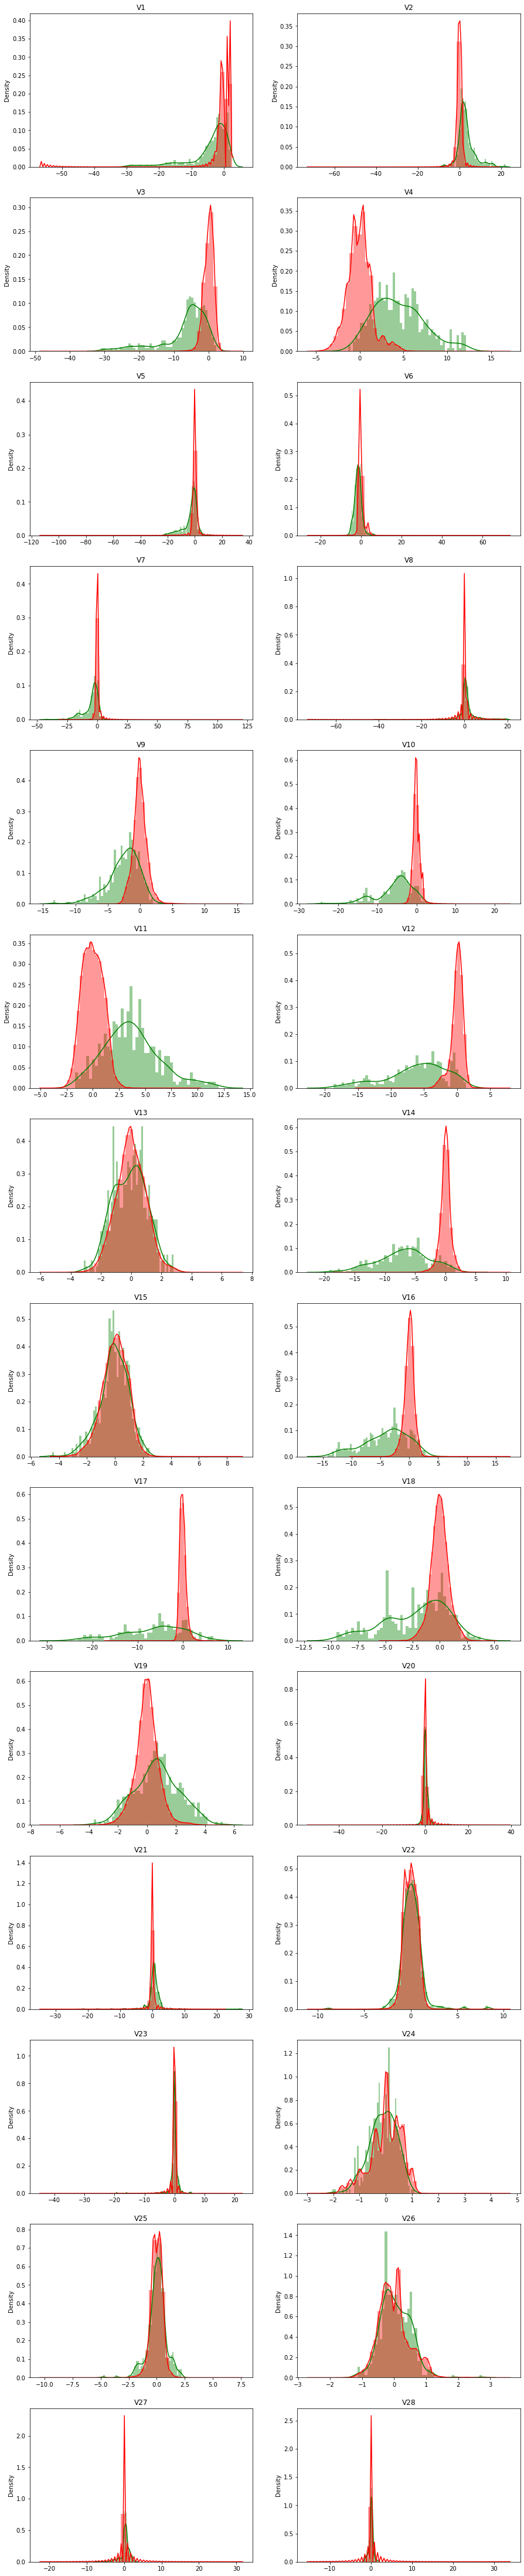

In [25]:
#Looking the V's features
columns = df.iloc[:,1:29].columns

frauds = df.Class == 1
normals = df.Class == 0

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(15,20*4))

for n, col in enumerate(df[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(df[col][frauds], bins = 50, color='g') 
    sns.distplot(df[col][normals], bins = 50, color='r') 
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()


We can see a interesting different distribuition in some of our features. I would like to select some V features where fraud class have a interesting behavior.


Feature selections

In [30]:
#I will select the variables where fraud class have a interesting behavior and might can help us predict

df = df[["Time_hour","Time_min","V2","V3","V4","V9","V10","V11","V12","V14","V16","V17","V18","V19","V27","Amount","Class"]]

In [31]:
#Looking the final df
df.head()

,Time_hour,Time_min,V2,V3,V4,V9,V10,V11,V12,V14,V16,V17,V18,V19,V27,Amount,Class
0,0,0,-0.072781,2.536347,1.378155,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,0.133558,149.62,0
1,0,0,0.266151,0.166480,0.448154,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.008983,2.69,0
2,0,0,-1.340163,1.773209,0.379780,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,-0.055353,378.66,0
3,0,0,-0.185226,1.792993,-0.863291,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,0.062723,123.50,0
4,0,0,0.877737,1.548718,0.403034,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,0.219422,69.99,0


Correlation matrix graphically gives us an idea of how features correlate with each other and can help us predict what are the features that are most relevant for the prediction.
Finally, it would be interesting to know if there are any significant correlations between our predictors, especially with regards to our class variable. One of the most visually appealing ways to determine that is by using a heatmap.


Plotting the Correlation Matrix

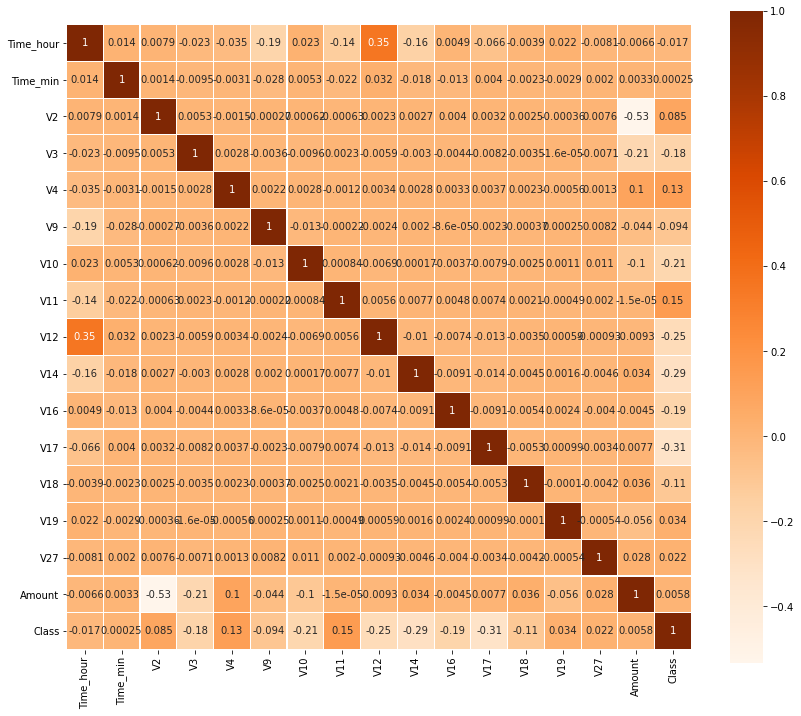

In [32]:
# calculate the correlation matrix
colormap = plt.cm.Oranges

plt.figure(figsize=(14,12))

sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap = colormap, linecolor='white', annot=True)
plt.show()

Some of the predictors do seem to be correlated with the Class variable but there seem to be relatively little significant correlations for such a large number of variables.

In [174]:
# save 
df.to_csv(r'C:\Users\arna_mora\Springboard\unit 7\creditcard.csv', index = False)